In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('c://jupyter/train.csv')

In [3]:
print(df.shape)

(42000, 785)


In [4]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [5]:
data=df.values

In [6]:
x=data[:, 1:]
y=data[:,0]

In [7]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
print(y)

[1 0 1 ... 7 6 9]


In [9]:
split=0.8*x.shape[0]

In [10]:
split=int(split)

In [11]:
x_train=x[:split, :]
y_train=y[:split]

In [12]:
x_test=x[split:, :]
y_test=y[split:]

In [13]:
print(x_train.shape)

(33600, 784)


In [14]:
print(x_test.shape)

(8400, 784)


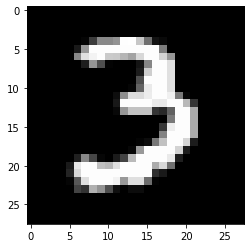

3


In [15]:
def drawing(sample):
    img=sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()
drawing(x_train[9])
print(y_train[9])

In [16]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [17]:
def knn(x,y,query,k=5):
    vals=[]
    for i in range(x.shape[0]):
        d=distance(query,x[i])
        vals.append((d, y[i]))
        
    vals=sorted(vals)
 
    vals=vals[:k]
    
    vals=np.array(vals)
    #majority vote of these k neighbours
    
    new_vals=np.unique(vals[:,1], return_counts=True)
    print(new_vals)
    
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    return pred

In [18]:
pred=knn(x_train,y_train,x_test[99])

(array([7.]), array([5]))


In [19]:
print(int(pred))

7


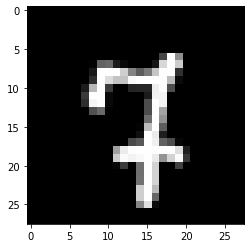

In [20]:
drawing(x_test[99])